In [1]:
!pip install deap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.2 MB/s eta 0:00:00


**Dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Algorithm:** SVM 

In [3]:
import numpy as np
from pandas import read_csv


# List of all the column names since there was none in the data
columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'

data = read_csv(url,header=None,names=columns)

X = data.iloc[:, 1:10]
y = data.iloc[:, 10:11]

print(data.shape)

X

(214, 11)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [4]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [5]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

encoder = ce.OrdinalEncoder()
X = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [22]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [8]:
svm_classifier = svm.SVC()
cv_results = model_selection.cross_val_score(svm_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[SVM] mean: ',cv_results.mean())

[SVM] mean:  0.3163398692810457


In [9]:
dt_classifier = DecisionTreeClassifier()
cv_results = model_selection.cross_val_score(dt_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[DT] mean: ',cv_results.mean())

[DT] mean:  0.6307189542483661


In [10]:
knn_classifier = KNeighborsClassifier()
cv_results = model_selection.cross_val_score(knn_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[KNN] mean: ',cv_results.mean())

[KNN] mean:  0.6258169934640523


In [11]:
gb_classifier = GradientBoostingClassifier()
cv_results = model_selection.cross_val_score(gb_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[GB] mean: ',cv_results.mean())

[GB] mean:  0.7016339869281045


In [23]:
from sklearn.metrics import roc_curve, auc

def get_mean_AUC(y_test, y_scores):
  # Compute ROC curve and AUC for each class
  n_classes = y_scores.shape[1]
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  ''' 
  # Aggregate the results
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
  mean_tpr /= n_classes
  roc_auc_macro = auc(all_fpr, mean_tpr)
  '''
  # Compute micro-average ROC curve and AUC
  all_fpr, mean_tpr, _ = roc_curve(np.ravel(y_test), y_scores.ravel())
  roc_auc_macro = auc(all_fpr, mean_tpr)

  return all_fpr, mean_tpr, roc_auc_macro

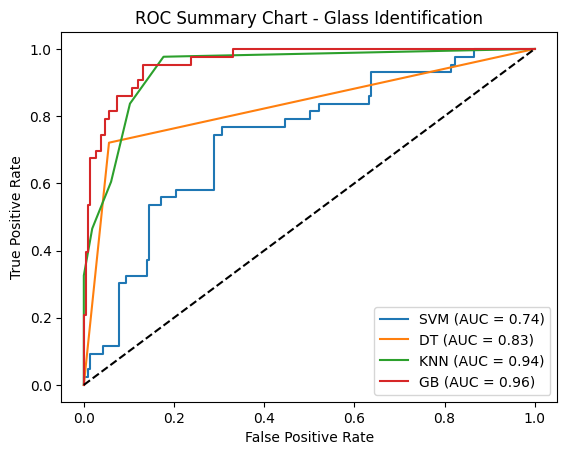

In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, y_train are the training data
# Assuming X_test, y_test are the test data

# Convert y_test to one-hot encoded matrix
n_classes = len(np.unique(y_train))
y_test_l = label_binarize(y_test, classes=np.arange(n_classes))

# Fit the model to the training data
svm_classifier.fit(X_train,y_train)
dt_classifier.fit(X_train,y_train)
knn_classifier.fit(X_train,y_train)
gb_classifier.fit(X_train,y_train)

# Predict probabilities for each class
y_scores1 = svm_classifier.decision_function(X_test)
y_scores2 = dt_classifier.predict_proba(X_test)
y_scores3 = knn_classifier.predict_proba(X_test)
y_scores4 = gb_classifier.decision_function(X_test)

all_fpr1, mean_tpr1, roc_auc_macro1 = get_mean_AUC(y_test_l, y_scores1)
all_fpr2, mean_tpr2, roc_auc_macro2 = get_mean_AUC(y_test_l, y_scores2)
all_fpr3, mean_tpr3, roc_auc_macro3 = get_mean_AUC(y_test_l, y_scores3)
all_fpr4, mean_tpr4, roc_auc_macro4 = get_mean_AUC(y_test_l, y_scores4)

# Plot the ROC curve for each class
plt.figure()
plt.plot(all_fpr1, mean_tpr1, label='SVM (AUC = %0.2f)' % roc_auc_macro1)
plt.plot(all_fpr2, mean_tpr2, label='DT (AUC = %0.2f)' % roc_auc_macro2)
plt.plot(all_fpr3, mean_tpr3, label='KNN (AUC = %0.2f)' % roc_auc_macro3)
plt.plot(all_fpr4, mean_tpr4, label='GB (AUC = %0.2f)' % roc_auc_macro4)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Summary Chart - Glass Identification')
plt.legend(loc='lower right')
plt.show()


In [25]:
y_scores1[0]

array([ 4.25119366,  5.27737497,  1.84013014,  0.74999867, -0.27765713,
        3.15731641])

In [26]:
import numpy as np

def calculate_rates(y_true, y_pred):
    # Get the unique classes
    classes = np.unique(y_true)
    
    tp_values, tn_values, fp_values, fn_values = [], [], [], []
    
    # Calculate TP, TN, FP, FN for each class
    for class_i in classes:
        mask_class_i = (y_true == class_i)
        mask_other_classes = (y_true != class_i)
        
        tp = np.sum((y_pred == class_i) & mask_class_i)
        tn = np.sum((y_pred != class_i) & mask_other_classes)
        fp = np.sum((y_pred == class_i) & mask_other_classes)
        fn = np.sum((y_pred != class_i) & mask_class_i)
        
        tp_values.append(tp)
        tn_values.append(tn)
        fp_values.append(fp)
        fn_values.append(fn)
    
    # Calculate total TP, TN, FP, FN
    total_tp = sum(tp_values)
    total_tn = sum(tn_values)
    total_fp = sum(fp_values)
    total_fn = sum(fn_values)
    
    # Calculate rates
    tpr = total_tp / (total_tp + total_fn)
    tnr = total_tn / (total_tn + total_fp)
    fpr = total_fp / (total_fp + total_tn)
    fnr = total_fn / (total_fn + total_tp)
    
    return tpr, tnr, fpr, fnr


KNN

In [27]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

knn_classifier1 = KNeighborsClassifier()
knn_classifier2 = KNeighborsClassifier(n_neighbors=3,
                                                    weights='distance',
                                                    p=1,
                                                    algorithm='kd_tree',
                                                    metric='minkowski')

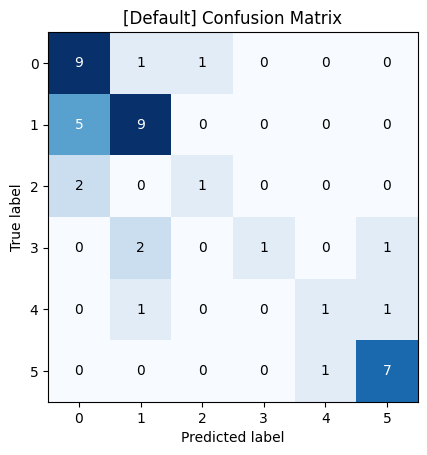

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
# for the Glass Identification dataset
# Fit the model to the training data
knn_classifier1.fit(X_train,y_train)
y_scores1 = knn_classifier1.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_scores1)

# Create a figure and axis for the plot
fig, ax = plt.subplots()
# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# Set the labels for the x-axis and y-axis
classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='[Default] Confusion Matrix')
# Rotate the x-axis labels if needed
plt.setp(ax.get_xticklabels(),
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

# Display the plot
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
accuracy = accuracy_score(y_test, y_scores1)
print(f"Accuracy: {accuracy * 100:.2f}%")


tpr, tnr, fpr, fnr = calculate_rates(y_test, y_scores1)

print(f"True Positive Rate (TPR): {round(tpr, 2)}")
print(f"True Negative Rate (TNR): {round(tnr, 2)}")
print(f"False Positive Rate (FPR): {round(fpr, 2)}")
print(f"False Negative Rate (FNR): {round(fnr, 2)}")

Accuracy: 65.12%
True Positive Rate (TPR): 0.65
True Negative Rate (TNR): 0.93
False Positive Rate (FPR): 0.07
False Negative Rate (FNR): 0.35


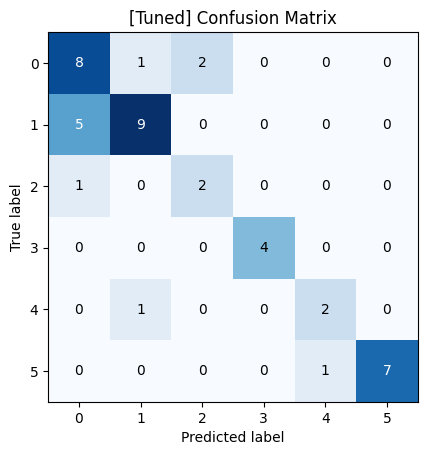

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
# for the Glass Identification dataset
knn_classifier2.fit(X_train,y_train)
y_scores2 = knn_classifier2.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_scores2)

# Create a figure and axis for the plot
fig, ax = plt.subplots()
# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# Set the labels for the x-axis and y-axis
classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='[Tuned] Confusion Matrix')
# Rotate the x-axis labels if needed
plt.setp(ax.get_xticklabels(),
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

# Display the plot
plt.show()

In [32]:
from sklearn.metrics import accuracy_score

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
accuracy = accuracy_score(y_test, y_scores2)
print(f"Accuracy: {accuracy * 100:.2f}%")


tpr, tnr, fpr, fnr = calculate_rates(y_test, y_scores2)

print(f"True Positive Rate (TPR): {round(tpr, 2)}")
print(f"True Negative Rate (TNR): {round(tnr, 2)}")
print(f"False Positive Rate (FPR): {round(fpr, 2)}")
print(f"False Negative Rate (FNR): {round(fnr, 2)}")

Accuracy: 74.42%
True Positive Rate (TPR): 0.74
True Negative Rate (TNR): 0.95
False Positive Rate (FPR): 0.05
False Negative Rate (FNR): 0.26
